In [332]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import imtools
import imutils
import pickle
from scipy.cluster.vq import *
import glob

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
from PIL import Image 
from pylab import *
import dlib


In [ ]:
## Operações de transformação e extração de features
* Filtros

* Detecção de contorno

* Detecção de padrão pré-treinado
    
* K-means
  * Redução de cor
  * Cores dominantes  

* Segmentação de imagem
    *grab cut

* dlib 
    * capturando pontos de interesse (facial)
    * capturando padrão em tempo real

## Aplicando filtro do tipo blur
* Suavização de imagem
* Eliminação de ruídos

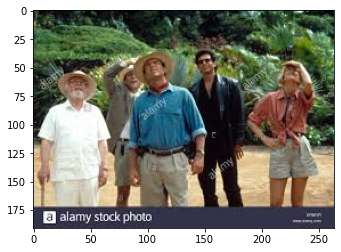

In [160]:
img = cv.imread('figs/JP.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

* blur variando tamanho da máscara: 5, 11, 17
* Suavização fica mais intensa a medida que aumentamos o tamanho da máscara

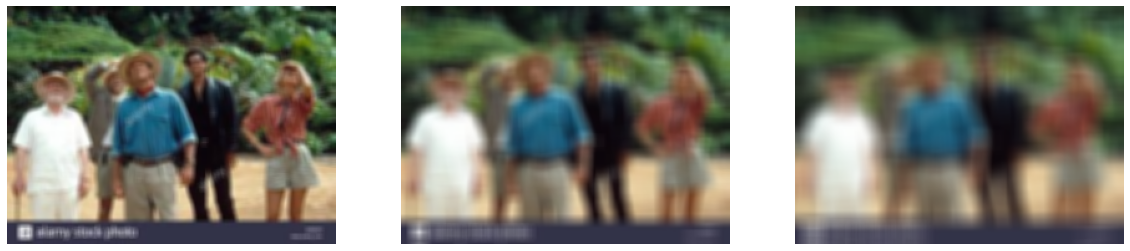

In [199]:
# diferentes tamanhos de kernel
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

## Aplicando diferentes tipos de blur

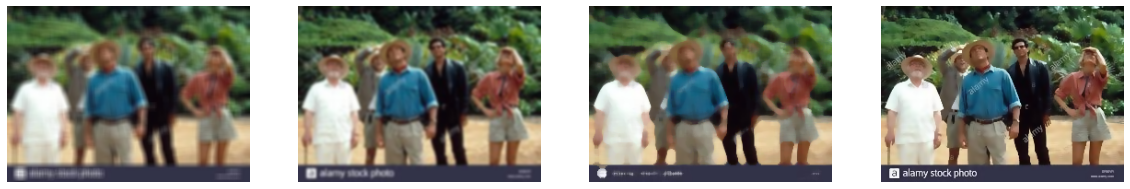

In [200]:
# filtros de blur
img_0 = cv.blur(img, ksize = (7, 7))
img_1 = cv.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv.medianBlur(img, 7)
img_3 = cv.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)

# Plot
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

## Comparando filtro blur com operação filter2D genérica

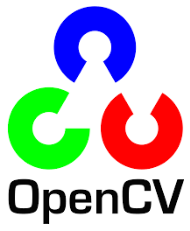

In [91]:
img1 = cv.imread('/home/silvio/opencvlogo.png')
plt.axis("off")
plt.imshow(img1)
plt.show()

# Aplicando filtro de blur 5x5
* Usando função filter2D

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


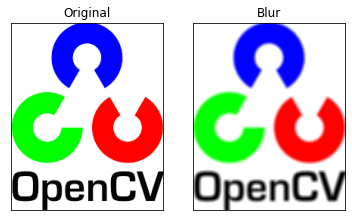

In [93]:
img = cv.imread('/home/silvio/opencvlogo.png')

# Kernel do filtro
kernel = np.ones((5,5),np.float32)/25
print(kernel)
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Blur
* Usando função blur 

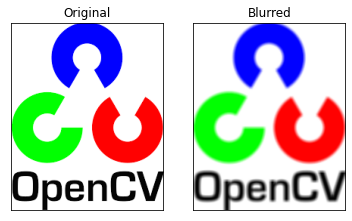

In [94]:

img = cv.imread('/home/silvio/opencvlogo.png')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


## Thresholding

* Thresholding transforma imagens em imagens binárias. 
* Com base em um valor limite e um valor máximo
* Ao aplicar essa operação, os pixels acima do limiar são alterados para o máximo e os que ficam abaixo são alterados para outro valor, que depende da estratégia de Thresholding

* Alguns tipos de Thresholding: 
    * binário
    * Binário inverso
    * limiar para zero
    * limiar para zero invertido 
    * truncamento de limiar.
    

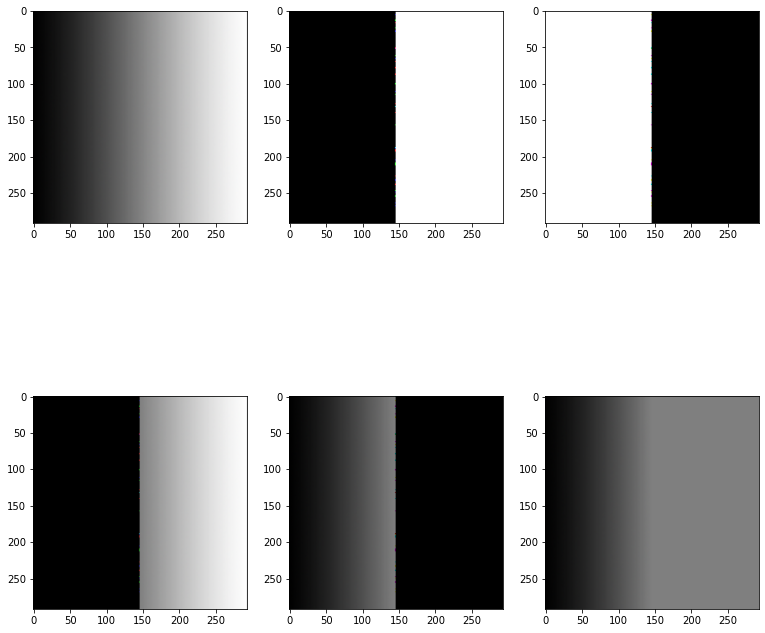

In [85]:
img = cv.imread('figs/degrade.png')

# Thresholding 
_, thresh_0 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, thresh_1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
_, thresh_2 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, thresh_3 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
_, thresh_4 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)

# Plot 
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()


* Usar um único valor de thresholding na imagem pode ser desafiador
* Uma abordagem melhor seria usar limites diferentes para cada parte da imagem. 
* Existe outra técnica chamada limiar adaptativo, que serve esse problema. 
* Ao calcular o limite dentro da área vizinha da imagem, podemos obter um melhor resultado com imagens com iluminação variável.

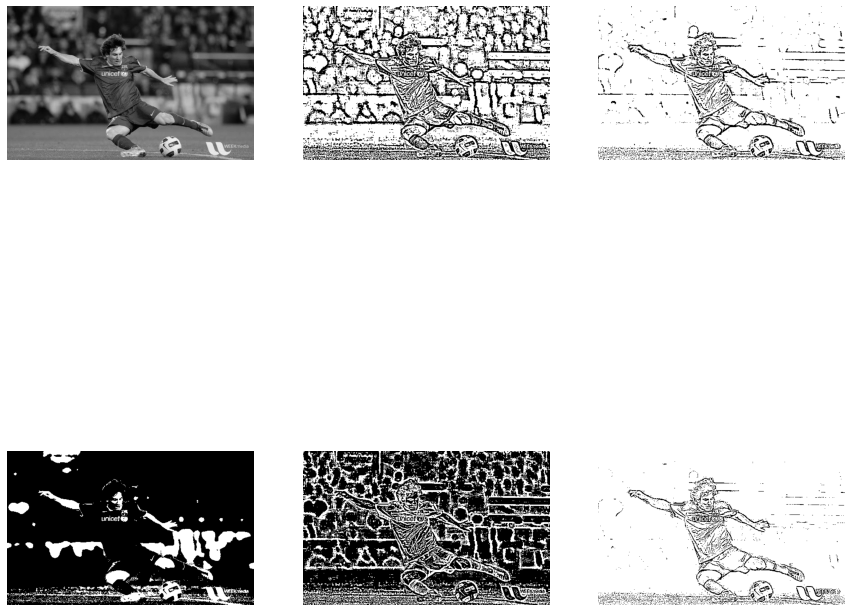

In [161]:

img = cv.imread('figs/JP.jpeg')
img = cv.imread('figs/messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Thresholding
_, thresh_binary = cv.threshold(img, thresh = 127, maxval = 255, type = cv.THRESH_BINARY)
adap_mean_2 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv.adaptiveThreshold(img, 255, 
                                        cv.ADAPTIVE_THRESH_MEAN_C, 
                                        cv.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv.THRESH_BINARY, 7, 8)

# Plot 
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

## Segundo exemplo com thresholding

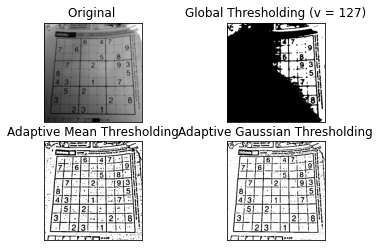

In [90]:
img = cv.imread('figs/sudoku.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original ', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Filtro de sobel

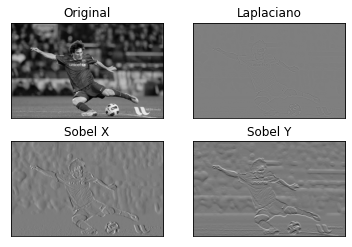

In [95]:
#img = cv.imread('figs/JP.jpeg')
img = cv.imread('figs/messi5.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## Transformações Morfológicas

* São processos que alteram a estrutura da imagem

## Erosão: 

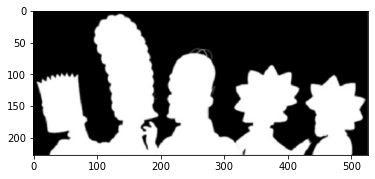

In [97]:
img_copy = cv.imread('figs/simpsons.png')
plt.imshow(img_copy)

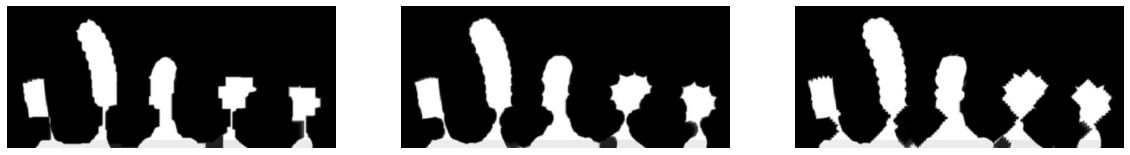

In [98]:
img = cv.imread('figs/simpsons.png')

#Criando kernels (filtros) para erosão
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv.getStructuringElement(cv.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]


plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

## Dilatação

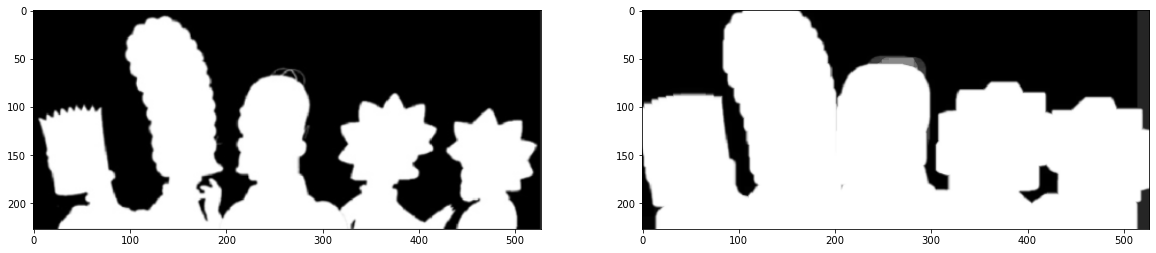

In [99]:
img = cv.imread('figs/simpsons.png')

kernel = np.ones((9, 9), np.uint8)
img_dilate = cv.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

# transformação de perspectiva
* getPerspectiveTransform

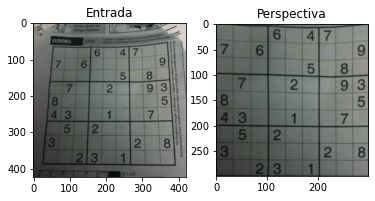

In [100]:
img = cv.imread('figs/sudoku.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Entrada')
plt.subplot(122),plt.imshow(dst),plt.title('Perspectiva')
plt.show()

# limpeza de ruídos

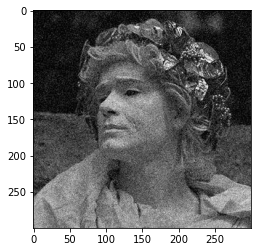

In [164]:
img = cv.imread('figs/noisy.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

## Fechamento

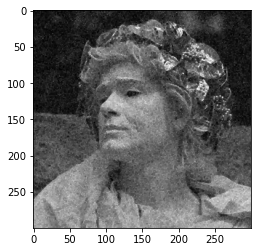

In [165]:
img = cv.imread('figs/noisy.jpg',0)
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

img = cv.cvtColor(closing, cv.COLOR_BGR2RGB)

plt.imshow(img)


## Abertura

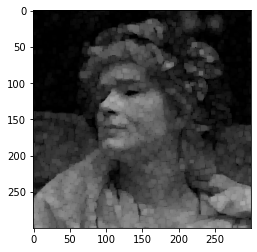

In [166]:
img = cv.imread('figs/noisy.jpg',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

img = cv.cvtColor(opening, cv.COLOR_BGR2RGB)

plt.imshow(img)

## Tophat

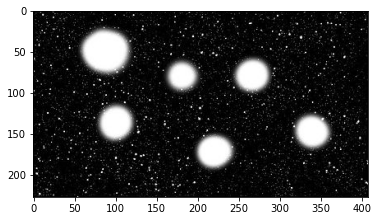

In [108]:
img = cv.imread('figs/blobs.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

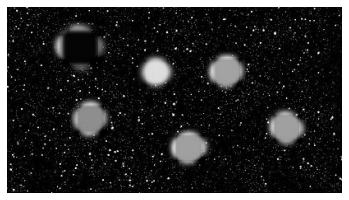

In [109]:
img = cv.imread('figs/blobs.png')
kernel = np.ones((30,30),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.axis("off")
plt.imshow(tophat)
plt.show()

## Filtros para detecção de contorno

## Canny edge
* Filtro para detecção de borda

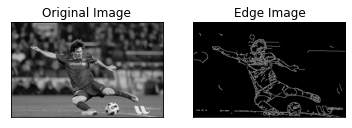

In [167]:
img = cv.imread('figs/messi5.jpg',0)

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [168]:
! ls figs

11.jpg				   imgTeste.jpg
baby.png			   imgTeste-rotated.jpg
blobs.png			   JP2.jpg
cars-in-middle-of-street-road.jpg  JP.jpeg
cars.jpg			   j.png
cinza.jpg			   kids.jpg
cinzaout.jpg			   logo.png
degrade.png			   messi5.jpg
dog2.jpg			   mug.jpg
Dog_dog.jpg			   noisy.jpg
elderly.jpg			   simpsons.png
hero.png			   sudoku.jpg
HubIA_Poligonos_data_cultura.csv   tetris.png
imgTeste-2.jpg


## Detectando círculos
* HoughCircles

<class 'numpy.ndarray'>
(1, 6, 3)
[[[154 140  19]
  [ 48 140  18]
  [100  48  19]
  [148 220  17]
  [ 20 220  17]
  [ 56 224  16]]]


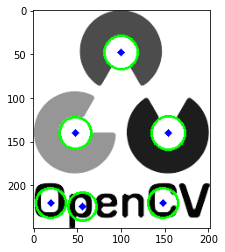

In [172]:
img = cv.imread('/home/silvio/opencvlogo.png',0)
#img = cv.imread('figs/cars-in-middle-of-street-road.jpg',0)

img = cv.medianBlur(img,5)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
# detectando círculos usando filtro houghlines
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

# formas encontras ficam armaenadas em uma estrutura que pode ser manipulada
circles = np.uint16(np.around(circles))
print(type(circles))
print(circles.shape)
print(circles)
for i in circles[0,:]:
    
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    
plt.imshow(cimg)
plt.show()

## Hough Lines 
* Detecção de linhas
* HoughLines
* HoughLinesP

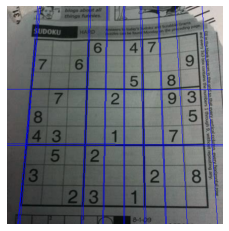

In [232]:

img = cv.imread(cv.samples.findFile('figs/sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),1)

cv.imwrite('houghlines3.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()

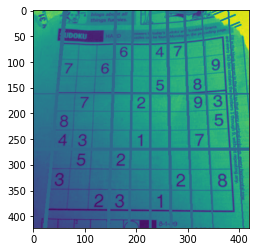

In [43]:
img = cv.imread('houghlines3.jpg',0)

plt.imshow(img)
plt.show()

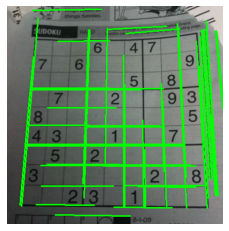

In [234]:
import cv2 as cv
import numpy as np
img = cv.imread(cv.samples.findFile('figs/sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlines5.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()

In [128]:
!ls figs

11.jpg				   imgTeste-rotated.jpg
baby.png			   JP2.jpg
blobs.png			   JP.jpeg
cars-in-middle-of-street-road.jpg  j.png
cars.jpg			   kids.jpg
cinza.jpg			   logo.png
cinzaout.jpg			   messi5.jpg
degrade.png			   mug.jpg
elderly.jpg			   noisy.jpg
hero.png			   simpsons.png
HubIA_Poligonos_data_cultura.csv   sudoku.jpg
imgTeste-2.jpg			   tetris.png
imgTeste.jpg


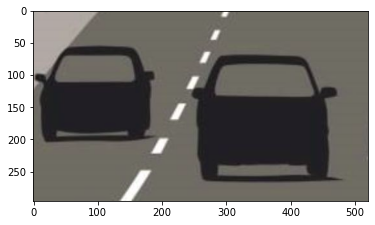

In [123]:
img = cv.imread('figs/cars.jpg')
plt.imshow(img, cmap = 'gray')

# Detectando contornos
* findContours

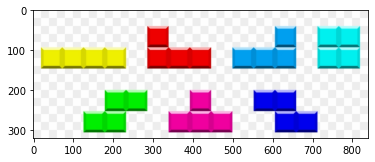

In [207]:
img = cv.imread('figs/tetris.png')
plt.imshow(img, cmap = 'gray')

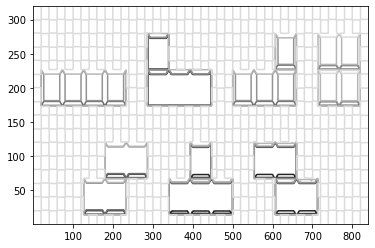

In [213]:

im = array(Image.open('figs/tetris.png').convert('L'))

figure()

gray()
# Mostra contornos na imagem original
c=contour(im, origin='image')
print(c)

* findContours
* convexHull

7


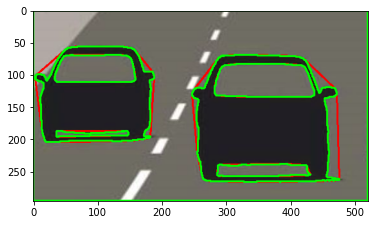

In [261]:
#img1 = cv2.imread('figs/cars-in-middle-of-street-road.jpg')
img1 = cv2.imread('figs/cars.jpg')


img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img,50,255,0)
#kernel = np.ones((9, 9), np.uint8)
#thresh = cv.dilate(thresh, kernel, iterations = 3)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
    cv2.drawContours(img1, [contours[i]], -1, (0, 255, 0), 2)

plt.imshow(img1, cmap = 'gray')

#Wcv2.imshow('ConvexHull', img1)
#cv2.waitKey(0)

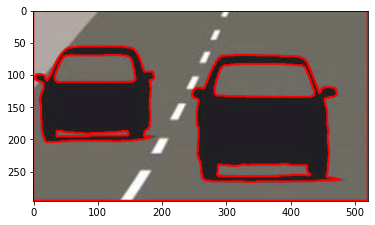

In [234]:
img1 = cv2.imread('figs/cars.jpg')
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    #cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
    cv2.drawContours(img1, [contours[i]], -1, (255, 0, 0), 2)

plt.imshow(img1, cmap = 'gray')

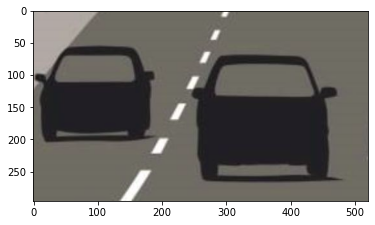

In [233]:
img1 = cv2.imread('figs/cars.jpg')
plt.imshow(img1, cmap = 'gray')

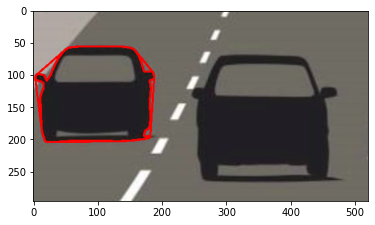

In [257]:
img1 = cv2.imread('figs/cars.jpg')
i=4
hull = cv2.convexHull(contours[i])
cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
cv2.drawContours(img1, [contours[i]], -1, (255, 0, 0), 2)

plt.imshow(img1, cmap = 'gray')

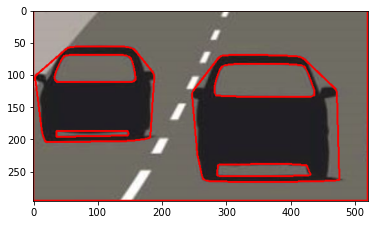

In [232]:
for i in range(len(contours)):
    #i=2
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
    #cv2.drawContours(img1, [contours[i]], -1, (255, 0, 0), 2)

plt.imshow(img1, cmap = 'gray')

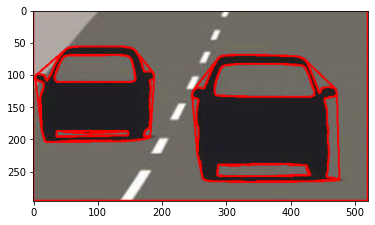

In [228]:
plt.imshow(img1, cmap = 'gray')

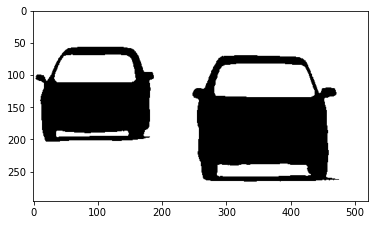

In [200]:
plt.imshow(thresh, cmap = 'gray')

# Detecção facial (padrão configurável)
* CascadeClassifier opencv - função que utiliza um padrão treinado previamente para detectar padrões na imagem
* Site com alguns padrões disponíveis: https://github.com/opencv/opencv/tree/master/data/haarcascades

In [262]:
!ls


figs		     haarcascade_frontalcatface.xml	  kmeans
haarcascade_eye.xml  haarcascade_frontalface_default.xml  openCV-Cont.ipynb


In [280]:
def detect_cat_face(img):
    
    image = img.copy()
    #image = cv2.imread(img_2)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    detector = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
    rects = detector.detectMultiScale(gray, scaleFactor=1.3,
        minNeighbors=10, minSize=(75, 75))

    for (i, (x, y, w, h)) in enumerate(rects):
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, "#{}".format(i + 1), (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)
    return(image)
    #plt.imshow(image, cmap = 'gray')

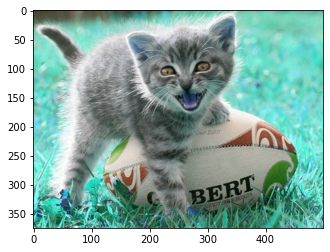

In [281]:
img = cv.imread('figs/cat_02.jpg')
plt.imshow(img, cmap = 'gray')

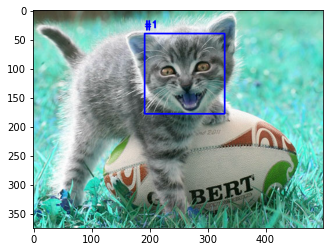

In [282]:
roi_detected = detect_cat_face(img)
plt.imshow(roi_detected, cmap = 'gray')

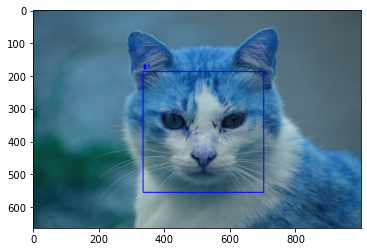

In [294]:
img = cv.imread('figs/gato7.jpg')
#plt.imshow(img, cmap = 'gray')
roi_detected = detect_cat_face(img)
plt.imshow(roi_detected)

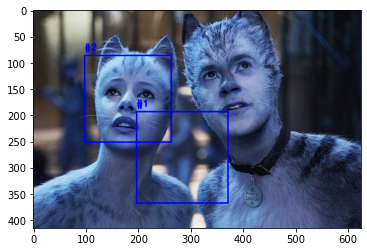

In [295]:
img = cv.imread('figs/gatos.jpg')
#plt.imshow(img, cmap = 'gray')
roi_detected = detect_cat_face(img)
plt.imshow(roi_detected)

* Detecção facial

In [180]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [181]:
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
 
    print(len(face_rects))
    
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

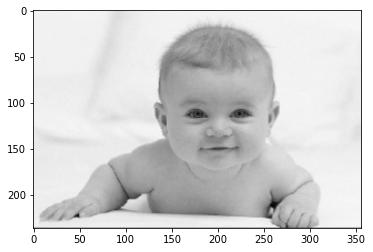

In [182]:
img = cv.imread('figs/baby.png')
plt.imshow(img, cmap = 'gray')


1


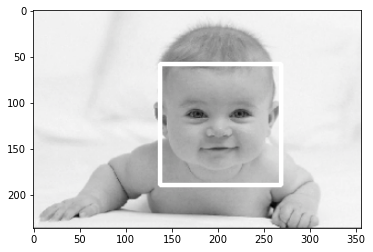

In [183]:
roi_detected = detect_face(img)
plt.imshow(roi_detected, cmap = 'gray')


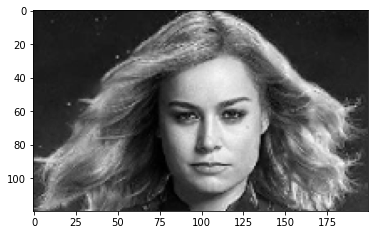

In [184]:
cap_mavl = cv.imread('figs/hero.png')

roi = cap_mavl[30:150, 80:280]
roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')


1


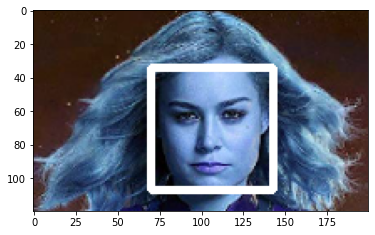

In [185]:
cap_mavl = cv.imread('figs/hero.png')

roi = cap_mavl[30:150, 80:280]
#roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
#plt.imshow(roi, cmap = 'gray')

roi_detected = detect_face(roi)
#plt.imshow(roi_detected, cmap = 'gray')
plt.imshow(roi_detected)

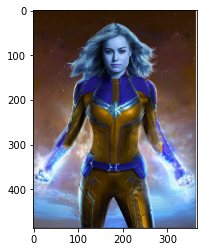

In [186]:
cap_mavl = cv.imread('figs/hero.png')
plt.imshow(cap_mavl, cmap = 'gray')

3


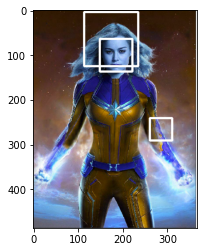

In [187]:
roi_detected = detect_face(cap_mavl)
plt.imshow(roi_detected, cmap = 'gray')

In [202]:
!ls figs

11.jpg				   imgTeste.jpg
baby.png			   imgTeste-rotated.jpg
blobs.png			   JP2.jpg
cars-in-middle-of-street-road.jpg  JP.jpeg
cars.jpg			   j.png
cinza.jpg			   kids.jpg
cinzaout.jpg			   logo.png
degrade.png			   messi5.jpg
dog2.jpg			   mug.jpg
Dog_dog.jpg			   noisy.jpg
elderly.jpg			   simpsons.png
hero.png			   sudoku.jpg
HubIA_Poligonos_data_cultura.csv   tetris.png
imgTeste-2.jpg


4


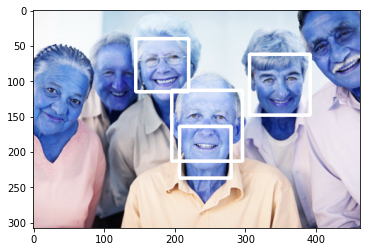

In [203]:
JP = cv.imread('figs/JP.jpeg')
JP = cv.imread('figs/elderly.jpg')
#plt.imshow(cap_mavl, cmap = 'gray')
roi_detected = detect_face(JP)
plt.imshow(roi_detected, cmap = 'gray')

# Kmeans + imagens

* Encontrando padrão de cores de uma imagem

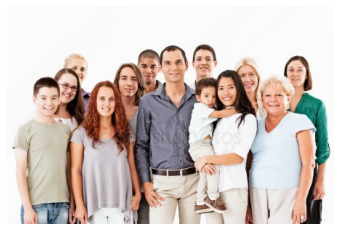

In [301]:
image = cv2.imread("figs/imgTeste.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

* Kmeans aplicado a imagem

In [194]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)
clt.fit(image)
print(clt.cluster_centers_)
print(clt.labels_)

[[177.88816356 177.89378485 177.90040346]
 [237.42259098 237.3689277  237.38930616]
 [137.21021856 137.27377301 137.20743865]]
[1 1 1 ... 0 0 0]


* Redução de cores na imagem

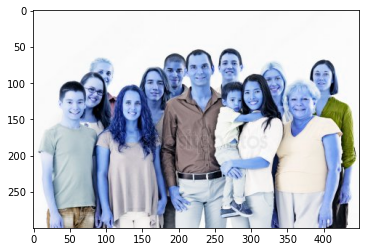

In [299]:
sample_img = cv.imread('figs/imgTeste.jpg')
plt.imshow(sample_img, cmap = 'gray')

300 450 3 (300, 450, 3)
(135000, 3)


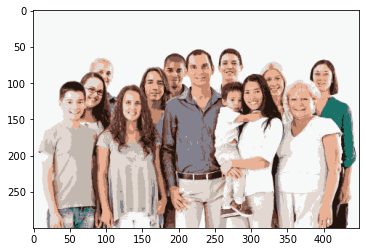

In [300]:
n_colors = 10

sample_img = imread('figs/imgTeste.jpg')
w,h,_ = sample_img.shape
print(w,h,_,sample_img.shape)
sample_img = sample_img.reshape(w*h,3)
print(sample_img.shape)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)

# detecta para cada pixel a qual grupo pertence
labels = kmeans.predict(sample_img)

# centroids representama a paleta de cores
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

# alterando os pixels originais pelos valor do pixel retornado pelo predict do kmeans
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]
    
recolored_img = recolored_img.reshape(w,h,3)
plt.imshow(recolored_img)

974 1300 3 (974, 1300, 3)
(1266200, 3)


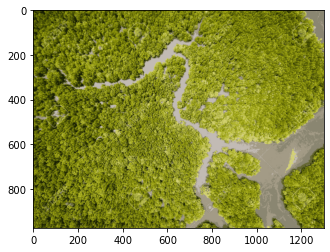

In [371]:
n_colors = 16

sample_img = imread('figs/100259822-drone-aerial-view-of-a-huge-natural-mangrove-forest-in-thailand.jpg')
w,h,_ = sample_img.shape
print(w,h,_,sample_img.shape)
sample_img = sample_img.reshape(w*h,3)
print(sample_img.shape)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(sample_img)

# detecta para cada pixel a qual grupo pertence
labels = kmeans.predict(sample_img)

# centroids representama a paleta de cores
identified_palette = np.array(kmeans.cluster_centers_).astype(int)

# alterando os pixels originais pelos valor do pixel retornado pelo predict do kmeans
recolored_img = np.copy(sample_img)
for index in range(len(recolored_img)):
    recolored_img[index] = identified_palette[labels[index]]
    
recolored_img = recolored_img.reshape(w,h,3)
plt.imshow(recolored_img)

# Plotando histograma de cores dominantes

In [302]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

In [303]:
def plot_colors(hist, centroids):

    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):

        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

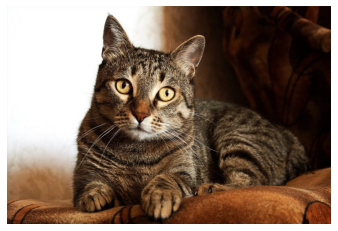

In [307]:
image = cv2.imread("figs/gato2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

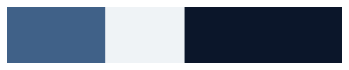

In [306]:
image = cv2.imread("figs/gato2.jpg")
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

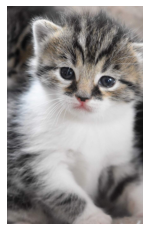

In [308]:
image = cv2.imread("figs/gato1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

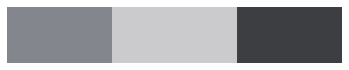

In [309]:
image = cv2.imread("figs/gato1.jpg")
image = image.reshape((image.shape[0] * image.shape[1], 3))
clt = KMeans(n_clusters = 3)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

# Segmentação de imagem

* Grabcut

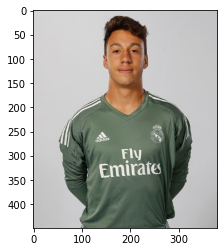

In [320]:
image = cv2.imread("figs/ju.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)

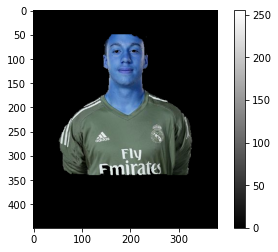

(<matplotlib.image.AxesImage at 0x7f4cd41c9280>,
 None)

In [321]:
img = cv2.imread('figs/ju.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

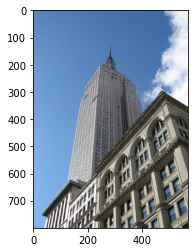

In [322]:
image = cv2.imread("figs/empire.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)

In [353]:
img = cv2.imread('figs/empire.jpg')
print(img.shape)
print(img.shape[:2])

(800, 569, 3)
(800, 569)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


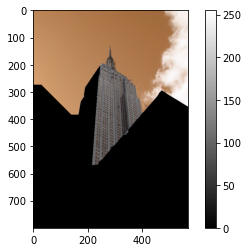

(<matplotlib.image.AxesImage at 0x7f4c9f0a40a0>,
 None)

In [355]:

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (0,0,800,569)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

# dlib

* captura de foto
* detecção facial
* Separação de área de interesse
    * Nariz, boca, etc
* Detecção em tempo real

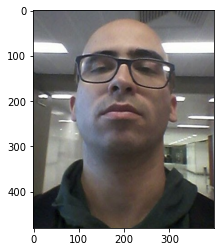

In [326]:
image = cv2.imread("silvio.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)

* detectando face
    * detector = dlib.get_frontal_face_detector()
* detectando pontos na face
    * predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

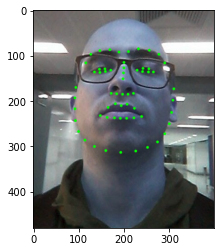

In [337]:
#detector facial
detector = dlib.get_frontal_face_detector()

# pontos a serem preditos ( 68 pontos da face)
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


img = cv2.imread("silvio.jpg")

# grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

# detectando landmarks
faces = detector(gray)
for face in faces:
    x1 = face.left() 
    y1 = face.top() 
    x2 = face.right() 
    y2 = face.bottom() 

    # objeto landmark
    landmarks = predictor(image=gray, box=face)

    # Loop pontos
    for n in range(0, 60):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

plt.figure()
plt.imshow(img)

# obtendo apenas olhos

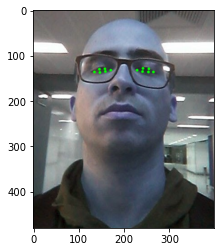

In [349]:
#detector facial
detector = dlib.get_frontal_face_detector()

# pontos a serem preditos ( 68 pontos da face)
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


img = cv2.imread("silvio.jpg")

# grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

# detectando landmarks
faces = detector(gray)
for face in faces:
    x1 = face.left() 
    y1 = face.top() 
    x2 = face.right() 
    y2 = face.bottom() 

    # objeto landmark
    landmarks = predictor(image=gray, box=face)

    # Loop pontos
    for n in range(36, 48):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

plt.figure()
plt.imshow(img)